In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Complete bayes.py so that it implements a Naive Bayes classifier for continuous data. 
Your implementation should work as the `fit` and `predict` methods in Scikit-learn. Specifically, predict must accept a matrix with several data points and return a vector with the predicted class for each one of them.

Recall that, for Naive Bayes classification, assuming independent Gaussian distributions

- the `fit` method must compute the mean and standard deviation of each column for each class.

- the `fit` method must also compute the proportion of appearence of the classes.

- the `predict` method must use the previously compute means and stdev estimate the probability of each data point belonging at each class. Then, **it will choose the class with most probability**

The unfinished script suggests using a Python dictionary to keep track of the means and stdevs.

Recall that the `predict` method will be receiving a $m\times n$ matrix with $m$ data points and $n$ dimensions (columns). For each datapoint $x = [x_0, x_1, ..., x_n]$ and each class (or label) $C_i$, you must compute:

$$P(C_i|x)P(x) = P(C_i)\prod_{j=0}^{n-1}P(x_j|C_i)$$

assuming that each column follow an independant Gaussian distribution for each class so that 

$$P(x_j|C_i) = \frac{1}{\sigma_{ij}\sqrt{2\pi}} e^{-\frac{(x_j-\mu_{ij})^2}{2\sigma^2_{ij}}}$$

where $\mu_{ij}$ and $\sigma_{ij}$ are the mean and stdev for column $j$ and class $i$ estimated in the `fit` method, together with $P(C_i)$.

Then, select as prediction for $x$ the class with greatest probability.

$$\underset{C_i}{arg\;max}\;\;P(C_i|x)P(C_i)$$

In [3]:
import numpy as np

class NaiveBayesClassifier:

    def __init__ (self):
        self.means = dict()
        self.stdevs = dict()
        self.labels = []
        self.class_probs = []

    def gaus(self,x,m=0,s=1):
        if s==0:
            s=0.0001
        f1 = 1/(s*(2*np.pi)**0.5)
        f2 = np.exp(-((x-m)**2)/(2*s**2))
        return ( f1*f2 )

    def fit(self, X,y):
        self.labels = np.unique(c);
        self.class_probs = ## calcula una lista con la proporcion de cada clase en self.labels en X
        for c in self.labels:
            this_label_data = ## selecciona los X con clase c
            self.means[c]   = ## calcula una lista con el promedio de cada columna de los datos de cla clase c
            self.stdevs[c]  = ## calcula una lista con la desv standard de cada columna de los datos de cla clase c

    def predict(self, X_new):
        probs=[]
        
        # 1. Calcula para cada elemento de X_new la probabilidad de pertenecer a cada clase
        # 2. Escoge, para cada elemento de X_new la clase con mayor probabilidad
        # 3. Devuelve una lista con todas las predicciones para cada elemento de X
        
        predictions = ....
        return predictions


Comprueba tu código

In [10]:
from sklearn.datasets import * 
from sklearn.naive_bayes import GaussianNB
import mlutils



/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


(0.684825, 0.315175)

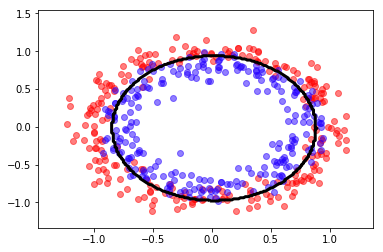

In [31]:
X,y = make_circles(noise=.1, n_samples=500)
gb = NaiveBayesClassifier()
gb.fit(X,y)
mlutils.plot_2Ddata_with_boundary(gb.predict, X,y)

/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


(0.192025, 0.1619)

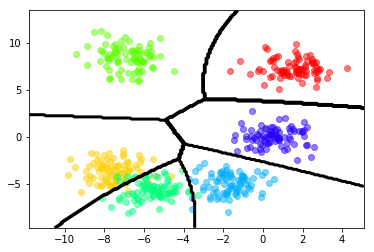

In [28]:
X,y = make_blobs(n_samples=500, n_features=2, centers=6)
gb = GaussianNB()
gb = NaiveBayesClassifier()
gb.fit(X,y)
mlutils.plot_2Ddata_with_boundary(gb.predict, X,y)

observa que cuando las distribuciones no son gaussianas el método falla

/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


(0.50745, 0.49255)

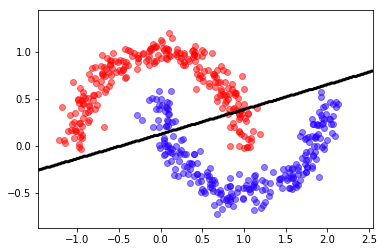

In [30]:
X,y = make_moons(noise=.1, n_samples=500)
gb = NaiveBayesClassifier()
gb.fit(X,y)
mlutils.plot_2Ddata_with_boundary(gb.predict, X,y)

observa que cuando las distribuciones son normales pero las columnas **no son independientes** el método falla.

/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


(0.386425, 0.613575)

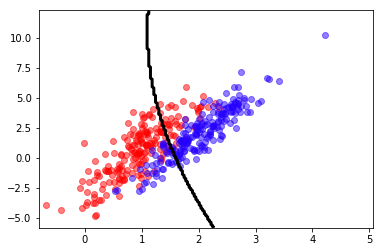

In [57]:
n=200
X = np.vstack((stats.multivariate_normal(mean=[1,1], cov=[[1,5],[.3,1]]).rvs(n), 
               stats.multivariate_normal(mean=[2,2], cov=[[1,4],[.2,1]]).rvs(n)))
y = np.r_[[0]*n+[1]*n]

gb = NaiveBayesClassifier()
gb.fit(X,y)
mlutils.plot_2Ddata_with_boundary(gb.predict, X,y)